# WORLD HAPPINES REPORT ANALYSIS

World Happiness Report, an annual report created by the UN Sustainable Development Solutions Network with the which assigns each country a happiness score based on the answers to a poll question that asks respondents to rank their life on a scale of 0 - 10.

It also includes estimates of factors that may contribute to each country's happiness, including economic production, social support, life expectancy, freedom, absence of corruption, and generosity, to provide context for the score. Although these factors aren't actually used in the calculation of the happiness score, they can help illustrate why a country received a certain score.

Below are descriptions for some of the columns we'll be working with:

- Country - Name of the country.
- Region - Name of the region the country belongs to.
- Happiness Rank - The rank of the country, as determined by its happiness score.
- Happiness Score - A score assigned to each country based on the answers to a poll question that asks respondents to rate their happiness on a scale of 0-10.
- Family - The estimated extent to which family contributes to the happiness score.
- Freedom - The estimated extent to which freedom contributes to the happiness score.
- Generosity - The estimated extent to which generosity contributes to the happiness score.

This analysis aims to answer the following questions:

- How can aggregating the data give us more insight into happiness scores?
- How did world happiness change from 2015 to 2017?
- Which factors contribute the most to the happiness score?

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
happiness2015 = pd.read_csv("World_Happiness_2015.csv")
first_5 = happiness2015.head(5) # first five rows
happiness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [113]:
print(first_5)

       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938           

In [ ]:
#

In [150]:
# display of mean for each region
mean_happiness={}
mean_econ ={}
mean_lifexp={}
mean_trust={}
mean_freedom={}
mean_generosity={}
mean_family={}
mean_dystopia={}

regions = happiness2015['Region'].unique()
for i in regions:
    # splitting data frame into groups
    region_group = happiness2015[happiness2015['Region']==i]
    # applying a function to each group
    region_mean = region_group['Happiness Score'].mean()
    region_econ_mean = region_group['Economy (GDP per Capita)'].mean()
    region_life_expectancy_mean = region_group['Health (Life Expectancy)'].mean()
    region_freedom_mean = region_group['Freedom'].mean()
    region_trust_mean = region_group['Trust (Government Corruption)'].mean()
    region_generosity = region_group['Generosity'].mean()
    region_family = region_group['Family'].mean()
    region_Dystopia = region_group['Dystopia Residual'].mean()
    # combine results in data structure
    mean_happiness[i] = region_mean
    mean_econ[i] = region_econ_mean
    mean_lifexp[i] = region_life_expectancy_mean
    mean_freedom[i] = region_freedom_mean
    mean_generosity[i]= region_generosity
    mean_family[i] = region_family
    mean_dystopia[i] = region_Dystopia

Text(0.5, 1.0, 'Average Happiness Score per Region')

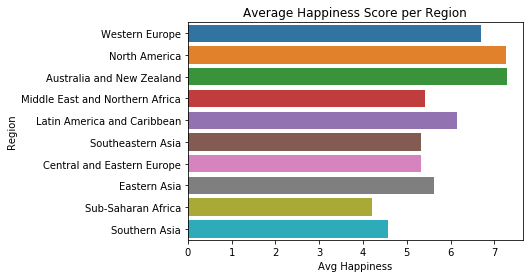

In [165]:
# convertion of dictionary to dataframe
from pandas import DataFrame
happinessmean = DataFrame(list(mean_happiness.items()), columns = ['Region', 'Avg Happiness'])
avghappiness = sns.barplot(y='Region', x='Avg Happiness', data=happinessmean)
plt.title('Average Happiness Score per Region')

# happinessmean.plot(x='Region', y='Happiness', kind='barh', title='Average Happiness Score Per Region', xlim=(0,10))

Text(0.5, 1.0, 'Average GDP per Region')

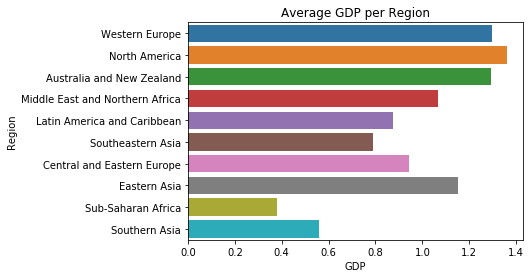

In [156]:
GDPmean = DataFrame(list(mean_econ.items()), columns = ['Region', 'GDP'])
# GDPmean.plot(x='Region', y='GDP', kind='barh', title='Average GDP per Region', xlim=(0, 2))
GDPavg = sns.barplot(y='Region', x='GDP', data=GDPmean)
plt.title('Average GDP per Region')

Text(0.5, 1.0, 'Average Life Expectancy Per Region')

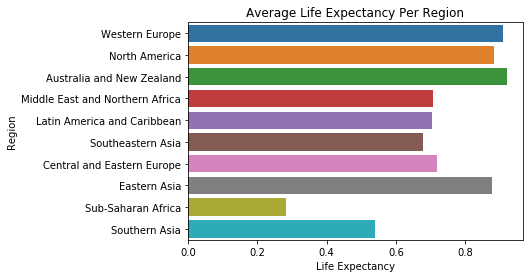

In [142]:
LifeExp = DataFrame(list(mean_lifexp.items()), columns = ['Region', 'Life Expectancy'])
# LifeExp.plot(x='Region', y='Life Expectancy', kind='barh', title='Average Life Expectancy per Region', xlim=(0, 1))

LifeExpec = sns.barplot(data = LifeExp, x='Life Expectancy', y= 'Region')
plt.title('Average Life Expectancy Per Region')

In [33]:
# Confirm unique regions
happiness2015['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [168]:
happiness2015['Region'].value_counts()


Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

Subsaharan Africa has the highest number of countries (40) and Australia and New zealand having the least (2)

In [170]:
# Group Data By Regions
grouped = happiness2015.groupby('Region')

Text(0.5, 1.0, 'South East Asia Happiness Scores')

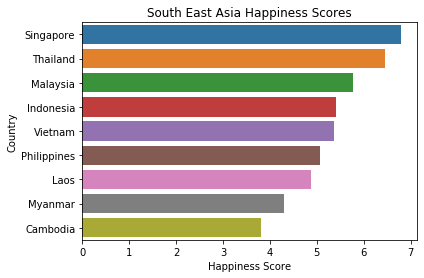

In [171]:
# Get South Eastern Asian Group
South_east_asia =grouped.get_group('Southeastern Asia') 
# Happiness Score
# South_east_asia = happiness2015[happiness2015['Region'] == 'Southeastern Asia']
# South_east_asia.plot(x='Country', y='Happiness Score', kind='barh', title='South Eastern Asia Happiness Score', xlim=(0, 10))
SEA = sns.barplot(x='Happiness Score', y='Country', data=South_east_asia)
plt.title('South East Asia Happiness Scores')

In [80]:
print(South_east_asia)

         Country             Region  Happiness Rank  Happiness Score  \
23     Singapore  Southeastern Asia              24            6.798   
33      Thailand  Southeastern Asia              34            6.455   
60      Malaysia  Southeastern Asia              61            5.770   
73     Indonesia  Southeastern Asia              74            5.399   
74       Vietnam  Southeastern Asia              75            5.360   
89   Philippines  Southeastern Asia              90            5.073   
98          Laos  Southeastern Asia              99            4.876   
128      Myanmar  Southeastern Asia             129            4.307   
144     Cambodia  Southeastern Asia             145            3.819   

     Standard Error  Economy (GDP per Capita)   Family  \
23          0.03780                   1.52186  1.02000   
33          0.03557                   0.96690  1.26504   
60          0.04330                   1.12486  1.07023   
73          0.02596                   0.82827  

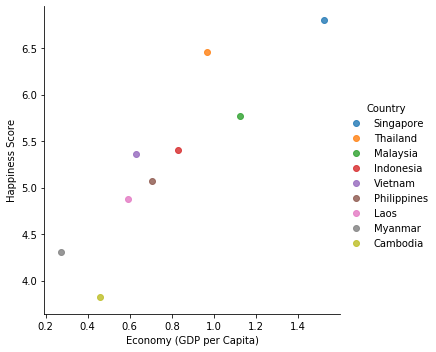

In [96]:
SEA_econ = sns.lmplot(data = South_eastA, x='Economy (GDP per Capita)', y='Happiness Score', fit_reg=False, hue ='Country', height = 5)

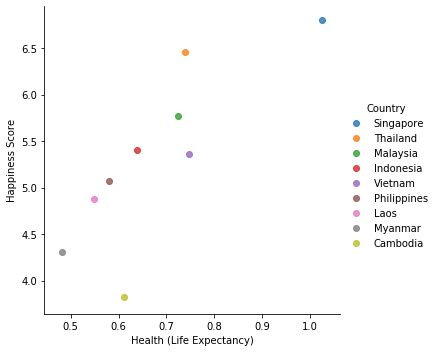

In [97]:
SEA_health = sns.lmplot(data = South_eastA, x='Health (Life Expectancy)', y='Happiness Score', fit_reg=False, hue ='Country', height = 5)

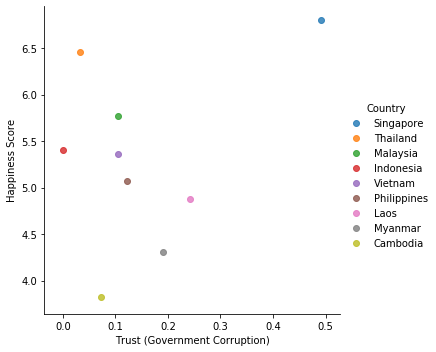

In [98]:
SEA_trust = sns.lmplot(data = South_eastA, x='Trust (Government Corruption)', y='Happiness Score', fit_reg=False, hue ='Country', height = 5)

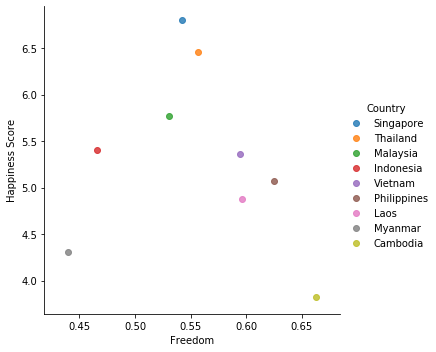

In [99]:
SEA_freedom = sns.lmplot(data = South_eastA, y='Happiness Score', x='Freedom', fit_reg=False, hue ='Country', height = 5)

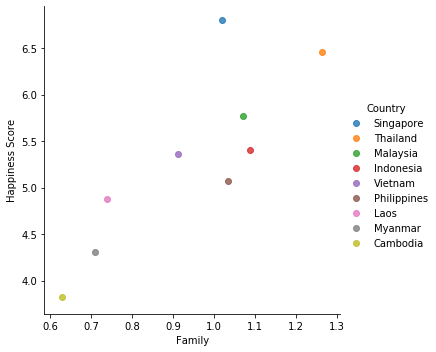

In [100]:
SEA_family = sns.lmplot(data = South_eastA, y='Happiness Score', x='Family', fit_reg=False, hue ='Country', height = 5)

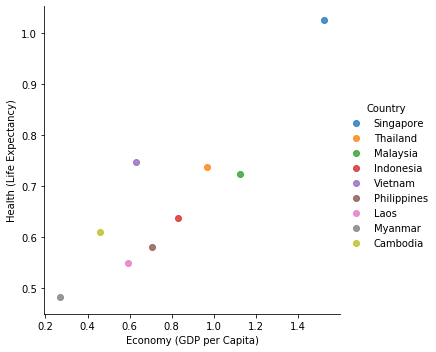

In [105]:
SEA_life_gdp = sns.lmplot(data = South_eastA, y='Health (Life Expectancy)', x='Economy (GDP per Capita)', fit_reg=False, hue='Country',height=5)

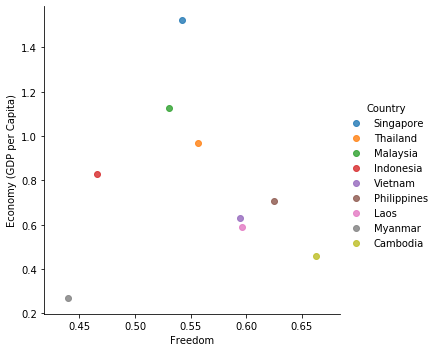

In [109]:
SEA_freedom_gdp = sns.lmplot(data = South_eastA, y='Economy (GDP per Capita)', x='Freedom', fit_reg=False, hue='Country', height=5)

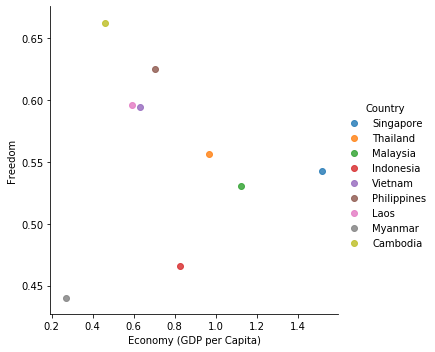

In [110]:
SEA_freedom_gdp = sns.lmplot(data = South_eastA, x='Economy (GDP per Capita)', y='Freedom', fit_reg=False, hue='Country', height=5)

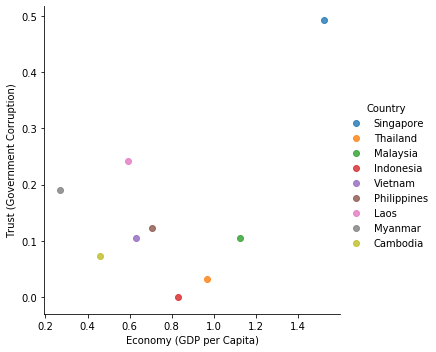

In [112]:
SEA_freedom_gdp = sns.lmplot(data = South_eastA, x='Economy (GDP per Capita)', y='Trust (Government Corruption)', fit_reg=False, hue='Country', height=5)